# Image Analysis of Pictures of Social Workers 

### Xiaochuan Rong

This project will analyze images regarding social workers collected from Google browser. The analysis will be developed from three aspects: 

1. Object Detection. By doing this, it can display us a general picture of what kind of items are in the context of social work, more specifically in the social work therapeutic scene. According to previous studies (Davies, 2020; DeAngelis, 2017), there are multiple kinds of stuff that are beneficial to be placed in therapeutic rooms and enable to help service users to gain positive therapeutic experience. For instance, research suggests that the presence of even small components of nature may be associated with better mental health; besides, items with soft or fluffy textures can also allow people to feel safe and comfortable. 


2. Face Detection. Relevant statistics surveyed in 2022 (LICENSED SOCIAL WORKER DEMOGRAPHICS AND STATISTICS IN THE US, 2022) show that there are over 188,401 licensed social workers currently employed in the United States, and 83.9% of them are women, while 16.1% are men. In addition, the most common ethnicity of licensed social workers is White (66.9%), followed by Black or African American (15.0%), Hispanic or Latino (12.4%), and Unknown (2.2%). Based on the above, I want to verify if the pictures of social workers on the Internet can reflect the reality of the composition of social workers in the western context or if pictures online are more likely to express an ideal expectation that the community of social workers is diverse and mixed.


3. Color Detection. There are also some suggestions and standards with respect to setting a cozy therapeutic room by selecting suitable colors. Experiments show that blue and green are the preferred colors, which can decrease blood pressure, pulse, and respiration, whereas others, such as red, tend to cause an increase in these biological functions. Moreover, the service users see black color as more pleasant and relaxing than white color (Liu et al., 2014). Therefore, in this case, I will pull out the colors in the collected pictures and find out if the colors are used, in fact, corresponding to the results of theoretical research.

## References

1. LICENSED SOCIAL WORKER DEMOGRAPHICS AND STATISTICS IN THE US. (2022). https://www.zippia.com/licensed-social-worker-jobs/demographics/
2. Davies, N. (2020). Designing the therapeutic space: Using layout, color, and other elements to get patients in the right frame of mind. Therapy Rooms. 
3. DeAngelis, T. (2017). Healing by design. https://www.apa.org/monitor/2017/03/healing-design#:~:text=Specifically%2C%20therapists%20should%3A,and%20relaxation%2C%20environmental%20designers%20say.
4. Liu, W., Ji, J., Chen, H., & Ye, C. (2014). Optimal color design of psychological counseling room by design of experiments and response surface methodology. PLoS ONE, 9(3), e90646. 


## Install Opencv and Import Libraries

In [1]:
!pip install opencv-python

In [2]:
import cv2
import glob
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

## Object Detection

The results of the bar chart shown below suggest items in these social worker-related images correspond to some characteristics as what the previous studies have presented. For instance, the detected objects contain couches, books, potted plants, teddy bears, etc., which are common in the therapeutic context.

In [3]:
!pip install -q transformers
!pip install -q timm
from transformers import pipeline
model = pipeline("object-detection")

No model was supplied, defaulted to facebook/detr-resnet-50 and revision 2729413 (https://huggingface.co/facebook/detr-resnet-50).
Using a pipeline without specifying a model name and revision in production is not recommended.
D:\Lund\python_analysis_of_content\Anaconada\lib\site-packages\transformers\models\detr\image_processing_detr.py:773: FutureWarning: The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
  warnings.warn(


In [4]:
model("D:\\Lund\\python_analysis_of_content\\assignment_2\\all_image\\image-01.jpg")

[{'score': 0.9376571178436279,
  'label': 'person',
  'box': {'xmin': 34, 'ymin': 63, 'xmax': 106, 'ymax': 142}},
 {'score': 0.9611539840698242,
  'label': 'person',
  'box': {'xmin': 18, 'ymin': 4, 'xmax': 195, 'ymax': 182}},
 {'score': 0.9946284890174866,
  'label': 'person',
  'box': {'xmin': 169, 'ymin': 59, 'xmax': 274, 'ymax': 182}}]

In [35]:
my_list = []
for img in sorted(glob.glob('D:\\Lund\\python_analysis_of_content\\assignment_2\\all_image\\*.*')):
  dict1 = {}
  res = model(img)
  dict1.update({"image": img, "result": res})
  my_list.append(dict1)

df = pd.DataFrame(my_list)

In [36]:
df.head()

image  \
0  D:\Lund\python_analysis_of_content\assignment_...   
1  D:\Lund\python_analysis_of_content\assignment_...   
2  D:\Lund\python_analysis_of_content\assignment_...   
3  D:\Lund\python_analysis_of_content\assignment_...   
4  D:\Lund\python_analysis_of_content\assignment_...   

                                              result  
0  [{'score': 0.9804900288581848, 'label': 'cell ...  
1  [{'score': 0.9547430276870728, 'label': 'chair...  
2  [{'score': 0.9141210317611694, 'label': 'perso...  
3  [{'score': 0.9376571178436279, 'label': 'perso...  
4  [{'score': 0.9606400728225708, 'label': 'perso...

In [37]:
my_list = []
for index, row in df.iterrows():
  for i in row.result:
    dict1 = {}
    dict1.update({"image":row.image})
    dict1.update(i)
    my_list.append(dict1)

df_res = pd.DataFrame(my_list)

In [38]:
df_res.head()

image     score       label  \
0  D:\Lund\python_analysis_of_content\assignment_...  0.980490  cell phone   
1  D:\Lund\python_analysis_of_content\assignment_...  0.998387      person   
2  D:\Lund\python_analysis_of_content\assignment_...  0.940461      person   
3  D:\Lund\python_analysis_of_content\assignment_...  0.954743       chair   
4  D:\Lund\python_analysis_of_content\assignment_...  0.981536      person   

                                                 box  
0  {'xmin': 155, 'ymin': 136, 'xmax': 182, 'ymax'...  
1  {'xmin': 12, 'ymin': 15, 'xmax': 152, 'ymax': ...  
2  {'xmin': 93, 'ymin': 10, 'xmax': 277, 'ymax': ...  
3  {'xmin': 184, 'ymin': 110, 'xmax': 258, 'ymax'...  
4  {'xmin': 94, 'ymin': 27, 'xmax': 211, 'ymax': ...

<AxesSubplot:>

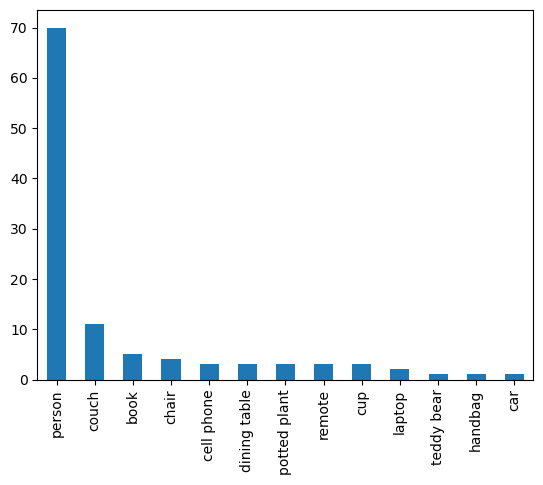

In [39]:
df_res.label.value_counts().plot(kind='bar')

### Convert BGR to RGB and Check Each Image

D:\Lund\python_analysis_of_content\assignment_2\image-01.jpg
D:\Lund\python_analysis_of_content\assignment_2\image-02.jpg
D:\Lund\python_analysis_of_content\assignment_2\image-03.jpg
D:\Lund\python_analysis_of_content\assignment_2\image-04.jpg
D:\Lund\python_analysis_of_content\assignment_2\image-05.jpg
D:\Lund\python_analysis_of_content\assignment_2\image-06.jpg
D:\Lund\python_analysis_of_content\assignment_2\image-07.jpg
D:\Lund\python_analysis_of_content\assignment_2\image-08.jpg
D:\Lund\python_analysis_of_content\assignment_2\image-09.jpg
D:\Lund\python_analysis_of_content\assignment_2\image-10.jpg
D:\Lund\python_analysis_of_content\assignment_2\image-11.jpg
D:\Lund\python_analysis_of_content\assignment_2\image-12.jpg
D:\Lund\python_analysis_of_content\assignment_2\image-13.jpg
D:\Lund\python_analysis_of_content\assignment_2\image-14.jpg
D:\Lund\python_analysis_of_content\assignment_2\image-15.jpg


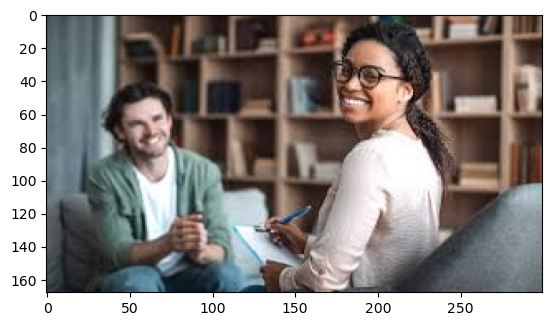

In [11]:
my_list=[]  
path = "D:\\Lund\\python_analysis_of_content\\assignment_2\\*.*"
for file in glob.glob(path):  
    print(file)     
    a= cv2.imread(file)  
    c = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)
    my_list.append(c)  

# By changing the number in the bracket, you can check any image you want.
plt.imshow(my_list[10])

## Edge Detection

I was trying to employ edge detection to find potential information and tended to understand these images better. However, after edging three images, I found it was not helpful to identify and interpret images effectively. Therefore, I started to use "haarcascade" classifier to detect faces in the images directly without too much preprocessing of the images.


In [12]:
import cv2 as cv
import numpy as np

img = cv.imread('D:\\Lund\\python_analysis_of_content\\assignment_2\\image-01.jpg')
cv.imshow('social worker', img)

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv.imshow('Gray', gray)

canny = cv.Canny(gray, 150, 175)
cv.imshow('Canny', canny)
cv.waitKey(0)

-1

In [13]:
import cv2 as cv
import numpy as np

img = cv.imread('D:\\Lund\\python_analysis_of_content\\assignment_2\\image-02.jpg')
cv.imshow('social worker', img)

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv.imshow('Gray', gray)

canny = cv.Canny(gray, 150, 175)
cv.imshow('Canny', canny)
cv.waitKey(0)

-1

In [14]:
import cv2 as cv
import numpy as np

img = cv.imread('D:\\Lund\\python_analysis_of_content\\assignment_2\\image-03.jpg')
cv.imshow('social worker', img)

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv.imshow('Gray', gray)

canny = cv.Canny(gray, 150, 175)
cv.imshow('Canny', canny)
cv.waitKey(0)

-1

## Face Detection

Here, I randomly selected 15 images from all of them and used "haarcascade" classifier to identify faces from each image. Due to the most images in terms of social workers I found from Google were only a few people in each of them, the significance of the face classifier was not manifested very well. Nevertheless, using the face classifier did facilitate the process of aiming faces and preparing for the subsequent operations.

Besides, not all of the faces in the images can be identified by the classifier, even though I have adjusted the parameters named "scaleFactor" and "minNeighbors" several times, which can affect the speed of detection and quality of the detected faces. Those images in which the faces inside couldn't be detected have some similar features. For example, people in the images who wear glasses or accessories are difficult to be detected; plus, people who are not facing the camera head-on are also filtered out by the classifier.

The results of the face detection suggest that within the 15 images, there is no significant indication that white people take over the major portion of social workers than others; in contrast, there are many people of color presenting in the images, which are not fitting in the statistics investigated in 2022. However, due to the limitation of the number of images and their uncertain source, it is hard to verify the survey results by only analyzing these images.

In [16]:
import cv2

img = cv2.imread('D:\\Lund\\python_analysis_of_content\\assignment_2\\image-01.jpg')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

faces = face_cascade.detectMultiScale(gray, 1.05, 5)

print(f'Number of faces found = {len(faces)}')

for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 5)

cv2.imshow('Detected Faces', img)

cv2.waitKey(0)
cv2.destroyAllWindows()

Number of faces found = 2


In [17]:
import cv2

img = cv2.imread('D:\\Lund\\python_analysis_of_content\\assignment_2\\image-02.jpg')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

faces = face_cascade.detectMultiScale(gray, 1.05, 5)

print(f'Number of faces found = {len(faces)}')

for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 5)

cv2.imshow('Detected Faces', img)

cv2.waitKey(0)
cv2.destroyAllWindows()

Number of faces found = 1


In [18]:
import cv2

img = cv2.imread('D:\\Lund\\python_analysis_of_content\\assignment_2\\image-03.jpg')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

faces = face_cascade.detectMultiScale(gray, 1.05, 5)

print(f'Number of faces found = {len(faces)}')

for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 5)

cv2.imshow('Detected Faces', img)

cv2.waitKey(0)
cv2.destroyAllWindows()

Number of faces found = 0


In [19]:
import cv2

img = cv2.imread('D:\\Lund\\python_analysis_of_content\\assignment_2\\image-04.jpg')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

faces = face_cascade.detectMultiScale(gray, 1.05, 5)

print(f'Number of faces found = {len(faces)}')

for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 5)
        
cv2.imshow('Detected Faces', img)

cv2.waitKey(0)
cv2.destroyAllWindows()

Number of faces found = 1


In [20]:
import cv2

img = cv2.imread('D:\\Lund\\python_analysis_of_content\\assignment_2\\image-05.jpg')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

faces = face_cascade.detectMultiScale(gray, 1.05, 5)

print(f'Number of faces found = {len(faces)}')

for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 5)

cv2.imshow('Detected Faces', img)

cv2.waitKey(0)
cv2.destroyAllWindows()

Number of faces found = 1


In [21]:
import cv2

img = cv2.imread('D:\\Lund\\python_analysis_of_content\\assignment_2\\image-06.jpg')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

faces = face_cascade.detectMultiScale(gray, 1.05, 5)

print(f'Number of faces found = {len(faces)}')

for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 5)

cv2.imshow('Detected Faces', img)

cv2.waitKey(0)
cv2.destroyAllWindows()

Number of faces found = 1


In [22]:
import cv2

img = cv2.imread('D:\\Lund\\python_analysis_of_content\\assignment_2\\image-07.jpg')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

faces = face_cascade.detectMultiScale(gray, 1.05, 5)

print(f'Number of faces found = {len(faces)}')

for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 5)

cv2.imshow('Detected Faces', img)

cv2.waitKey(0)
cv2.destroyAllWindows()

Number of faces found = 1


In [23]:
import cv2

img = cv2.imread('D:\\Lund\\python_analysis_of_content\\assignment_2\\image-08.jpg')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

faces = face_cascade.detectMultiScale(gray, 1.05, 5)

print(f'Number of faces found = {len(faces)}')

for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 5)

cv2.imshow('Detected Faces', img)

cv2.waitKey(0)
cv2.destroyAllWindows()

Number of faces found = 1


In [24]:
import cv2

img = cv2.imread('D:\\Lund\\python_analysis_of_content\\assignment_2\\image-09.jpg')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

faces = face_cascade.detectMultiScale(gray, 1.05, 5)

print(f'Number of faces found = {len(faces)}')

for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 5)

cv2.imshow('Detected Faces', img)

cv2.waitKey(0)
cv2.destroyAllWindows()

Number of faces found = 1


In [25]:
import cv2

img = cv2.imread('D:\\Lund\\python_analysis_of_content\\assignment_2\\image-10.jpg')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

faces = face_cascade.detectMultiScale(gray, 1.05, 5)

print(f'Number of faces found = {len(faces)}')

for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 5)

cv2.imshow('Detected Faces', img)

cv2.waitKey(0)
cv2.destroyAllWindows()

Number of faces found = 0


In [26]:
import cv2

img = cv2.imread('D:\\Lund\\python_analysis_of_content\\assignment_2\\image-11.jpg')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

faces = face_cascade.detectMultiScale(gray, 1.05, 5)

print(f'Number of faces found = {len(faces)}')

for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 5)

cv2.imshow('Detected Faces', img)

cv2.waitKey(0)
cv2.destroyAllWindows()

Number of faces found = 1


In [27]:
import cv2

img = cv2.imread('D:\\Lund\\python_analysis_of_content\\assignment_2\\image-12.jpg')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

faces = face_cascade.detectMultiScale(gray, 1.05, 5)

print(f'Number of faces found = {len(faces)}')

for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 5)

cv2.imshow('Detected Faces', img)

cv2.waitKey(0)
cv2.destroyAllWindows()

Number of faces found = 1


In [28]:
import cv2

img = cv2.imread('D:\\Lund\\python_analysis_of_content\\assignment_2\\image-13.jpg')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

faces = face_cascade.detectMultiScale(gray, 1.05, 5)

print(f'Number of faces found = {len(faces)}')

for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 5)

cv2.imshow('Detected Faces', img)

cv2.waitKey(0)
cv2.destroyAllWindows()

Number of faces found = 2


In [29]:
import cv2

img = cv2.imread('D:\\Lund\\python_analysis_of_content\\assignment_2\\image-14.jpg')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

faces = face_cascade.detectMultiScale(gray, 1.05, 5)

print(f'Number of faces found = {len(faces)}')

for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 5)

cv2.imshow('Detected Faces', img)

cv2.waitKey(0)
cv2.destroyAllWindows()

Number of faces found = 2


In [30]:
import cv2

img = cv2.imread('D:\\Lund\\python_analysis_of_content\\assignment_2\\image-15.jpg')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

faces = face_cascade.detectMultiScale(gray, 1.05, 5)

print(f'Number of faces found = {len(faces)}')

for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 5)

cv2.imshow('Detected Faces', img)

cv2.waitKey(0)
cv2.destroyAllWindows()

Number of faces found = 1


## Color Detection

The results of color detection suggest that most of the colors in the pictures are dark tones, and there are many green and blue shades in the composition. It is rare to find bright tones or colors. The findings can corroborate the previous studies.

In [19]:
from sklearn.cluster import KMeans
from collections import Counter
from matplotlib import pyplot as plt
import cv2

In [20]:
# Utility function, rgb to hex
def rgb2hex(rgb):
    hex = "#{:02x}{:02x}{:02x}".format(int(rgb[0]), int(rgb[1]), int(rgb[2]))
    return hex
print(rgb2hex([255, 0, 0]))

#ff0000


In [21]:
def plot_image_info(path, k=8):
    # load image
    img_bgr = cv2.imread(path)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

    # resize image to speed up processing time
    resized_img_rgb = cv2.resize(img_rgb, (64, 64), interpolation=cv2.INTER_AREA)

    # reshape the image to be a list of pixels
    img_list = resized_img_rgb.reshape((resized_img_rgb.shape[0] * resized_img_rgb.shape[1], 3))

    # cluster the pixels and assign labels
    clt = KMeans(n_clusters=k)
    labels = clt.fit_predict(img_list)
        
    # count labels to find most popular
    label_counts = Counter(labels)
    total_count = sum(label_counts.values())

    # subset out most popular centroid
    center_colors = list(clt.cluster_centers_)
    ordered_colors = [center_colors[i]/255 for i in label_counts.keys()]
    color_labels = [rgb2hex(ordered_colors[i]*255) for i in label_counts.keys()]
    
    #print(label_counts.values())
    #print(color_labels)
    
    # plots
    plt.figure(figsize=(14, 8))
    plt.subplot(221)
    plt.imshow(img_rgb)
    plt.axis('off')
    
    plt.subplot(222)
    plt.pie(label_counts.values(), labels=color_labels, colors=ordered_colors, startangle=90)
    plt.axis('equal')
    plt.show()

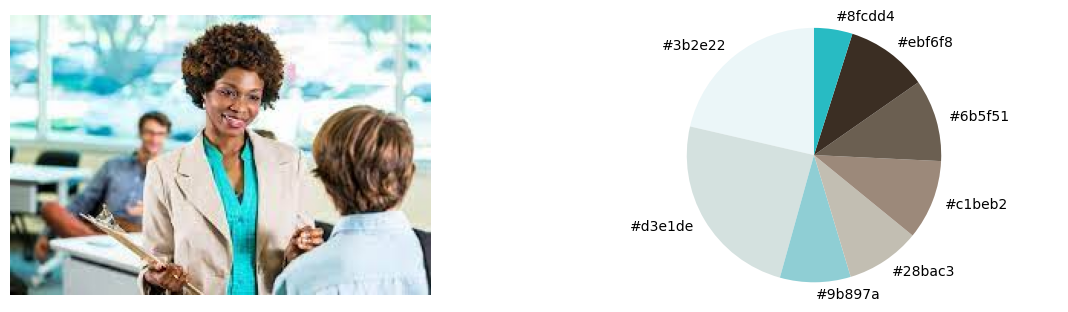

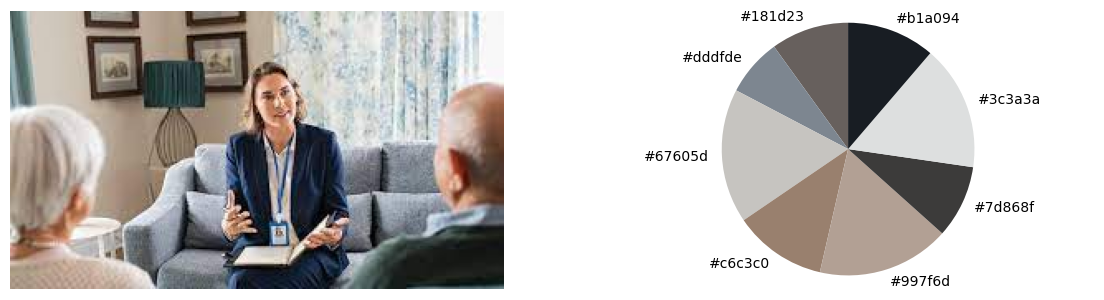

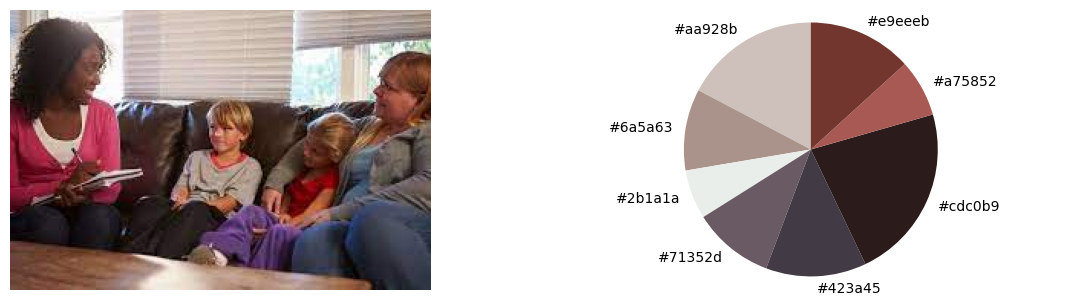

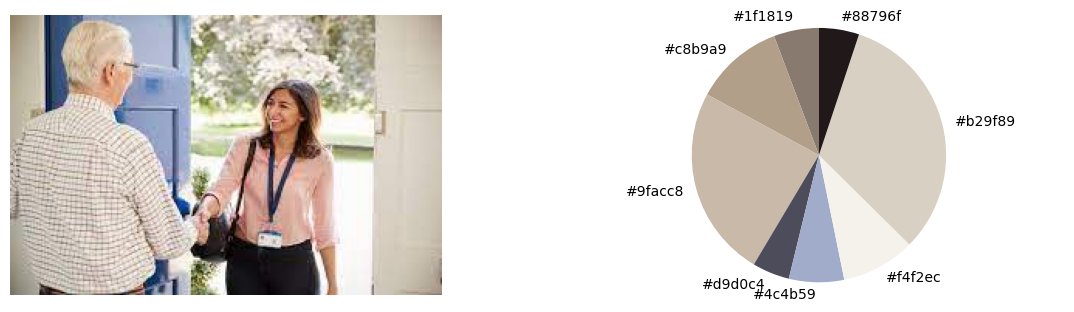

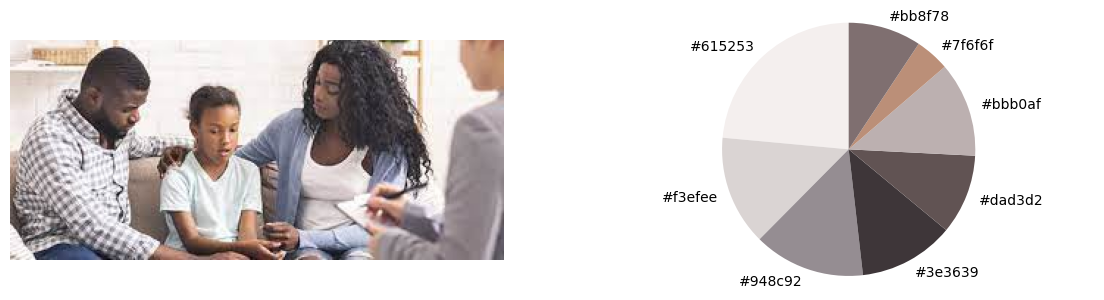

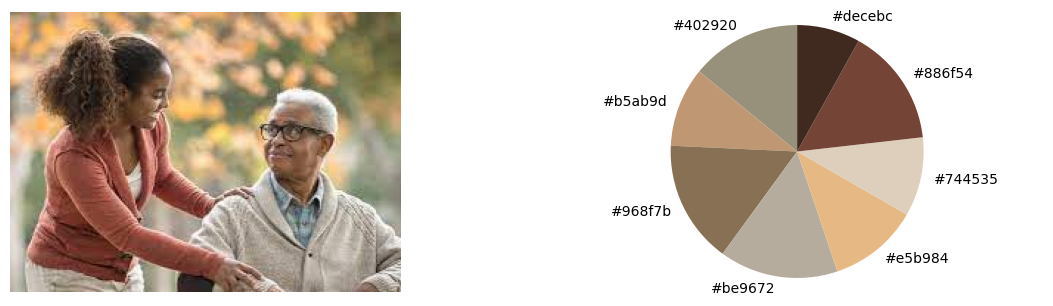

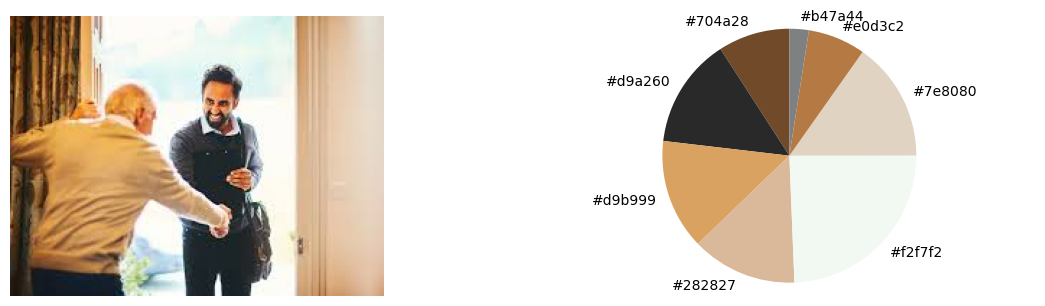

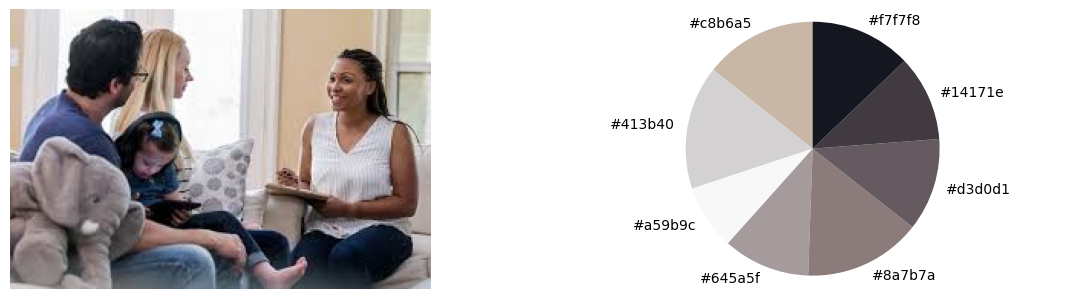

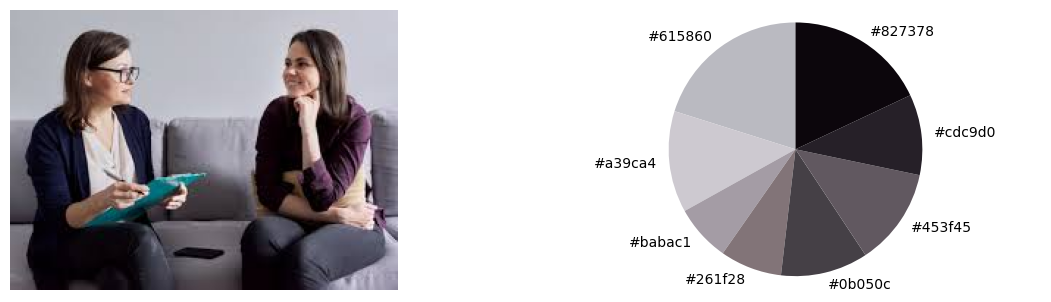

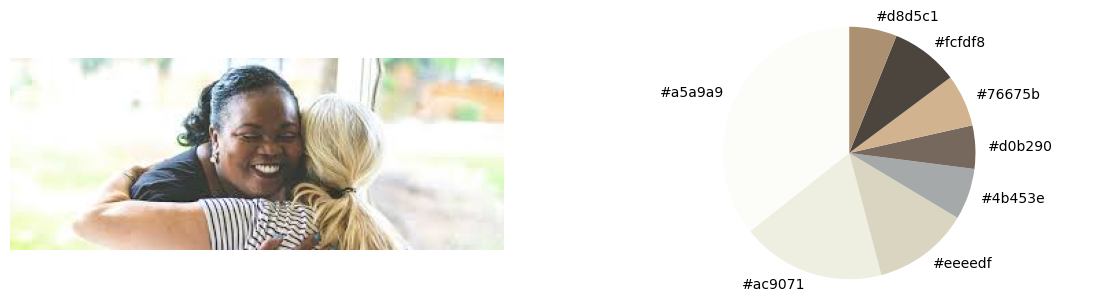

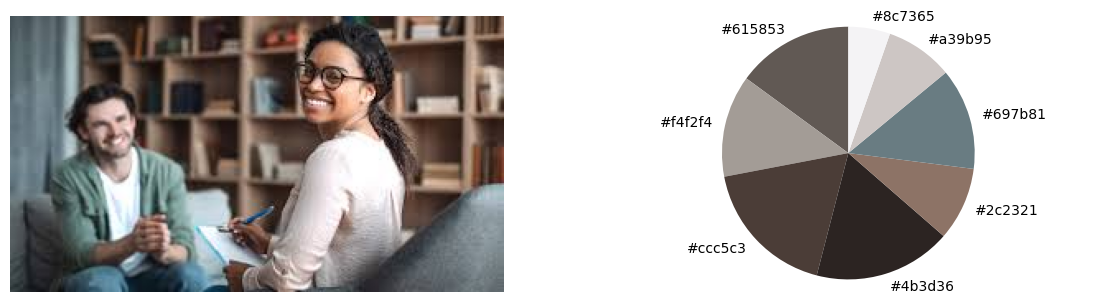

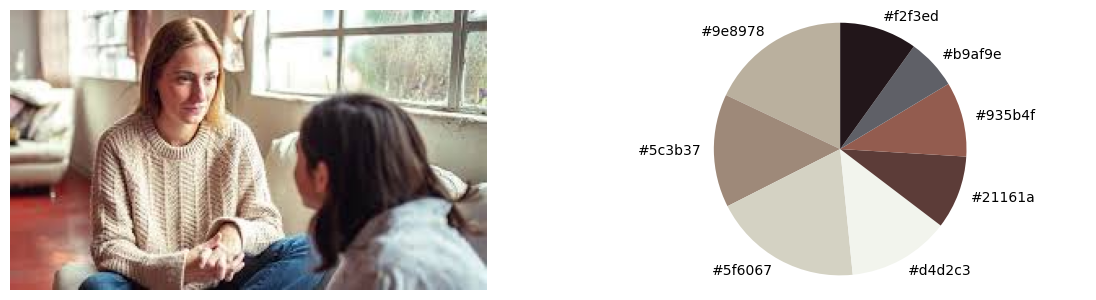

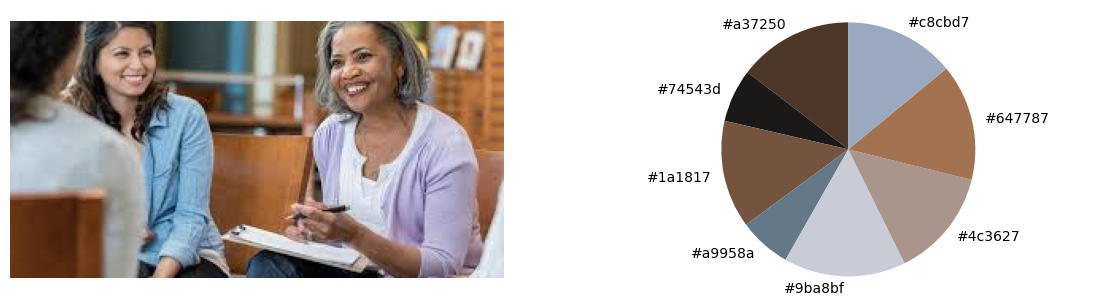

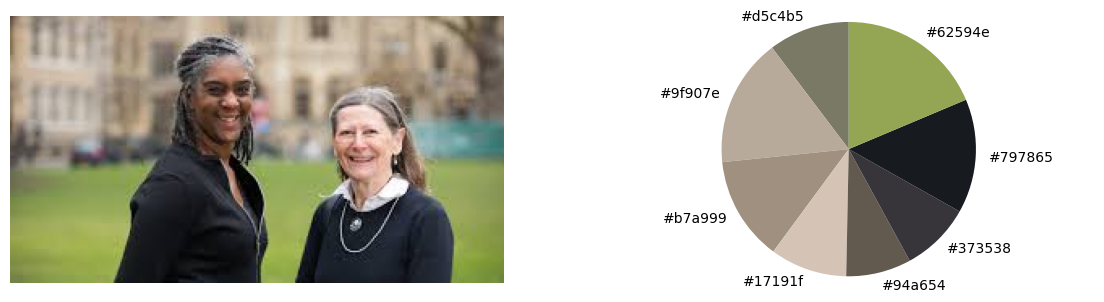

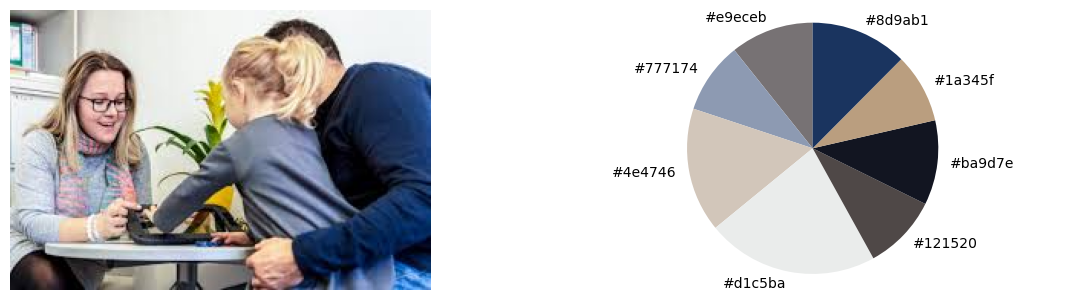

In [22]:
plot_image_info("D:\\Lund\\python_analysis_of_content\\assignment_2\\image-01.jpg")
plot_image_info("D:\\Lund\\python_analysis_of_content\\assignment_2\\image-02.jpg")
plot_image_info("D:\\Lund\\python_analysis_of_content\\assignment_2\\image-03.jpg")
plot_image_info("D:\\Lund\\python_analysis_of_content\\assignment_2\\image-04.jpg")
plot_image_info("D:\\Lund\\python_analysis_of_content\\assignment_2\\image-05.jpg")
plot_image_info("D:\\Lund\\python_analysis_of_content\\assignment_2\\image-06.jpg")
plot_image_info("D:\\Lund\\python_analysis_of_content\\assignment_2\\image-07.jpg")
plot_image_info("D:\\Lund\\python_analysis_of_content\\assignment_2\\image-08.jpg")
plot_image_info("D:\\Lund\\python_analysis_of_content\\assignment_2\\image-09.jpg")
plot_image_info("D:\\Lund\\python_analysis_of_content\\assignment_2\\image-10.jpg")
plot_image_info("D:\\Lund\\python_analysis_of_content\\assignment_2\\image-11.jpg")
plot_image_info("D:\\Lund\\python_analysis_of_content\\assignment_2\\image-12.jpg")
plot_image_info("D:\\Lund\\python_analysis_of_content\\assignment_2\\image-13.jpg")
plot_image_info("D:\\Lund\\python_analysis_of_content\\assignment_2\\image-14.jpg")
plot_image_info("D:\\Lund\\python_analysis_of_content\\assignment_2\\image-15.jpg")

### Cropping, Resizing and Stitching Images

For better display and comparison of color palettes, I saved the pictures above and manipulated them by cropping, resizing, and stitching them together into one picture, which is displayed in the end.

In [12]:
import cv2
import numpy as np
img1 = cv2.imread("D:\\Lund\\python_analysis_of_content\\assignment_2\\color\\color01.jpg")
img2 = cv2.imread("D:\\Lund\\python_analysis_of_content\\assignment_2\\color\\color02.jpg")
img3 = cv2.imread("D:\\Lund\\python_analysis_of_content\\assignment_2\\color\\color03.jpg")
img4 = cv2.imread("D:\\Lund\\python_analysis_of_content\\assignment_2\\color\\color04.jpg")
img5 = cv2.imread("D:\\Lund\\python_analysis_of_content\\assignment_2\\color\\color05.jpg")
img6 = cv2.imread("D:\\Lund\\python_analysis_of_content\\assignment_2\\color\\color06.jpg")
img7 = cv2.imread("D:\\Lund\\python_analysis_of_content\\assignment_2\\color\\color07.jpg")
img8 = cv2.imread("D:\\Lund\\python_analysis_of_content\\assignment_2\\color\\color08.jpg")
img9 = cv2.imread("D:\\Lund\\python_analysis_of_content\\assignment_2\\color\\color09.jpg")
img10 = cv2.imread("D:\\Lund\\python_analysis_of_content\\assignment_2\\color\\color10.jpg")
img11 = cv2.imread("D:\\Lund\\python_analysis_of_content\\assignment_2\\color\\color11.jpg")
img12 = cv2.imread("D:\\Lund\\python_analysis_of_content\\assignment_2\\color\\color12.jpg")
img13 = cv2.imread("D:\\Lund\\python_analysis_of_content\\assignment_2\\color\\color13.jpg")
img14 = cv2.imread("D:\\Lund\\python_analysis_of_content\\assignment_2\\color\\color14.jpg")
img15 = cv2.imread("D:\\Lund\\python_analysis_of_content\\assignment_2\\color\\color15.jpg")

(309, 1068, 3)
(300, 1104, 3)
(306, 1068, 3)
(312, 1074, 3)
(301, 1104, 3)
(303, 1053, 3)
(306, 1045, 3)
(299, 1068, 3)
(301, 1051, 3)
(304, 1104, 3)
(304, 1104, 3)
(300, 1096, 3)
(303, 1104, 3)
(306, 1104, 3)
(300, 1068, 3)


In [13]:
# ROI (Region of interest)
cv2.rectangle(img1, (600, 0), (1020, 299), (0, 255, 0), 3)
roi1 = img1[0: 299, 600: 1020]

cv2.imshow('color1', roi1)

cv2.waitKey(0)

-1

In [14]:
cv2.rectangle(img1, (600, 0), (1020, 299), (0, 255, 0), 3)
cv2.rectangle(img2, (600, 0), (1020, 299), (0, 255, 0), 3)
cv2.rectangle(img3, (600, 0), (1020, 299), (0, 255, 0), 3)
cv2.rectangle(img4, (600, 0), (1020, 299), (0, 255, 0), 3)
cv2.rectangle(img5, (600, 0), (1020, 299), (0, 255, 0), 3)
cv2.rectangle(img6, (600, 0), (1020, 299), (0, 255, 0), 3)
cv2.rectangle(img7, (600, 0), (1020, 299), (0, 255, 0), 3)
cv2.rectangle(img8, (600, 0), (1020, 299), (0, 255, 0), 3)
cv2.rectangle(img9, (600, 0), (1020, 299), (0, 255, 0), 3)
cv2.rectangle(img10, (600, 0), (1020, 299), (0, 255, 0), 3)
cv2.rectangle(img11, (600, 0), (1020, 299), (0, 255, 0), 3)
cv2.rectangle(img12, (600, 0), (1020, 299), (0, 255, 0), 3)
cv2.rectangle(img13, (600, 0), (1020, 299), (0, 255, 0), 3)
cv2.rectangle(img14, (600, 0), (1020, 299), (0, 255, 0), 3)
cv2.rectangle(img15, (600, 0), (1020, 299), (0, 255, 0), 3)


roi1 = img1[0: 299, 600: 1020]
roi2 = img2[0: 299, 600: 1020]
roi3 = img3[0: 299, 600: 1020]
roi4 = img4[0: 299, 600: 1020]
roi5 = img5[0: 299, 600: 1020]
roi6 = img6[0: 299, 600: 1020]
roi7 = img7[0: 299, 600: 1020]
roi8 = img8[0: 299, 600: 1020]
roi9 = img9[0: 299, 600: 1020]
roi10 = img10[0: 299, 600: 1020]
roi11 = img11[0: 299, 600: 1020]
roi12 = img12[0: 299, 600: 1020]
roi13 = img13[0: 299, 600: 1020]
roi14 = img14[0: 299, 600: 1020]
roi15 = img15[0: 299, 600: 1020]

In [15]:
print(roi1.shape)
print(roi2.shape)
print(roi3.shape)
print(roi4.shape)
print(roi5.shape)
print(roi6.shape)
print(roi7.shape)
print(roi8.shape)
print(roi9.shape)
print(roi10.shape)
print(roi11.shape)
print(roi12.shape)
print(roi13.shape)
print(roi14.shape)
print(roi15.shape)

(299, 420, 3)
(299, 420, 3)
(299, 420, 3)
(299, 420, 3)
(299, 420, 3)
(299, 420, 3)
(299, 420, 3)
(299, 420, 3)
(299, 420, 3)
(299, 420, 3)
(299, 420, 3)
(299, 420, 3)
(299, 420, 3)
(299, 420, 3)
(299, 420, 3)


In [24]:
roi1 = cv2.resize(roi1, (0,0), None, 0.5, 0.5)
roi2 = cv2.resize(roi2, (0,0), None, 0.5, 0.5)
roi3 = cv2.resize(roi3, (0,0), None, 0.5, 0.5)
roi4 = cv2.resize(roi4, (0,0), None, 0.5, 0.5)
roi5 = cv2.resize(roi5, (0,0), None, 0.5, 0.5)
roi6 = cv2.resize(roi6, (0,0), None, 0.5, 0.5)
roi7 = cv2.resize(roi7, (0,0), None, 0.5, 0.5)
roi8 = cv2.resize(roi8, (0,0), None, 0.5, 0.5)
roi9 = cv2.resize(roi9, (0,0), None, 0.5, 0.5)
roi10 = cv2.resize(roi10, (0,0), None, 0.5, 0.5)
roi11 = cv2.resize(roi11, (0,0), None, 0.5, 0.5)
roi12 = cv2.resize(roi12, (0,0), None, 0.5, 0.5)
roi13 = cv2.resize(roi13, (0,0), None, 0.5, 0.5)
roi14 = cv2.resize(roi14, (0,0), None, 0.5, 0.5)
roi15 = cv2.resize(roi15, (0,0), None, 0.5, 0.5)

hor_row1 = np.hstack([roi1,roi2,roi3,roi4,roi5])
hor_row2 = np.hstack([roi6,roi7,roi8,roi9,roi10])
hor_row3 = np.hstack([roi11,roi12,roi13,roi14,roi15])

ver = np.vstack([hor_row1, hor_row2, hor_row3])

cv2.imshow('Vertical', ver)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [17]:
cv2.imwrite('D:\\Lund\\python_analysis_of_content\\assignment_2\\image_color\\color.jpg',ver)

True